<a href="https://colab.research.google.com/github/LuisDevil72/Prueba/blob/main/TRANSFERENCIA_APRENDIZAJE/Transferencia_de_datosTarea.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Julio cesar Ojeda Czruz
Jennifer Elizabeth Mu<ñiz Fabela
Luis Alberto Valencia Rodriguez

In [ ]:
# Importación de librerías necesarias
from tensorflow.keras.applications.vgg16 import VGG16, preprocess_input
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense, Flatten
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import numpy as np
import matplotlib.pyplot as plt
from google.colab import drive

In [ ]:
# Monta Google Drive para acceder a los datos
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
# Configuración de parámetros para el modelo y el generador de datos
IMAGE_SIZE = (224, 224)
BATCH_SIZE = 32

train_dir = '/content/drive/MyDrive/entrenamiento/entrenamiento'
test_dir = '/content/drive/MyDrive/prueba/prueba'

In [ ]:


# Generadores de datos con aumento de datos para el conjunto de entrenamiento
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

test_datagen = ImageDataGenerator(rescale=1./255)

train_data = train_datagen.flow_from_directory(
    train_dir,
    target_size=IMAGE_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='categorical'
)

test_data = test_datagen.flow_from_directory(
    test_dir,
    target_size=IMAGE_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='categorical'
)

Found 250 images belonging to 5 classes.
Found 250 images belonging to 5 classes.


In [ ]:

# Carga del modelo VGG16 preentrenado como base del modelo
pre_trained_model = VGG16(input_shape=IMAGE_SIZE + (3,), include_top=False, weights='imagenet')
pre_trained_model.trainable = False

58889256/58889256 [==============================] - 0s 0us/step


In [ ]:
# Creación del modelo personalizado añadiendo capas densas
x = Flatten()(pre_trained_model.output)
x = Dense(2048, activation='relu')(x)
x = Dense(512, activation='relu')(x)
output = Dense(5, activation='softmax')(x)
model = Model(inputs=pre_trained_model.input, outputs=output)

In [ ]:


# Compilación del modelo
model.compile(loss='categorical_crossentropy', optimizer='sgd', metrics=['accuracy'])

# Entrenamiento del modelo
history = model.fit(
    train_data,
    validation_data=test_data,
    epochs=50
)


Epoch 1/50
8/8 [==============================] - 95s 11s/step - loss: 3.3620 - accuracy: 0.2440 - val_loss: 1.4892 - val_accuracy: 0.3640
Epoch 2/50
8/8 [==============================] - 11s 1s/step - loss: 1.5340 - accuracy: 0.3000 - val_loss: 1.2491 - val_accuracy: 0.5760
Epoch 3/50
8/8 [==============================] - 11s 1s/step - loss: 1.3140 - accuracy: 0.4480 - val_loss: 1.5866 - val_accuracy: 0.2280
Epoch 4/50
8/8 [==============================] - 11s 1s/step - loss: 1.2585 - accuracy: 0.4480 - val_loss: 0.9657 - val_accuracy: 0.6680
Epoch 5/50
8/8 [==============================] - 10s 1s/step - loss: 1.1122 - accuracy: 0.5560 - val_loss: 1.1160 - val_accuracy: 0.6600
Epoch 6/50
8/8 [==============================] - 10s 1s/step - loss: 1.2314 - accuracy: 0.5440 - val_loss: 0.6912 - val_accuracy: 0.7440
Epoch 7/50
8/8 [==============================] - 11s 1s/step - loss: 0.7251 - accuracy: 0.7800 - val_loss: 0.6636 - val_accuracy: 0.6720
Epoch 8/50
8/8 [=================

In [ ]:

# Guardar el modelo entrenado
model.save('/content/drive/MyDrive/model.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:

# Función para visualizar imágenes
def plotImages(images_arr):
    fig, axes = plt.subplots(1, 10, figsize=(20, 20))
    axes = axes.flatten()
    for img, ax in zip(images_arr, axes):
        ax.imshow(img)
        ax.axis('off')
    plt.tight_layout()
    plt.show()


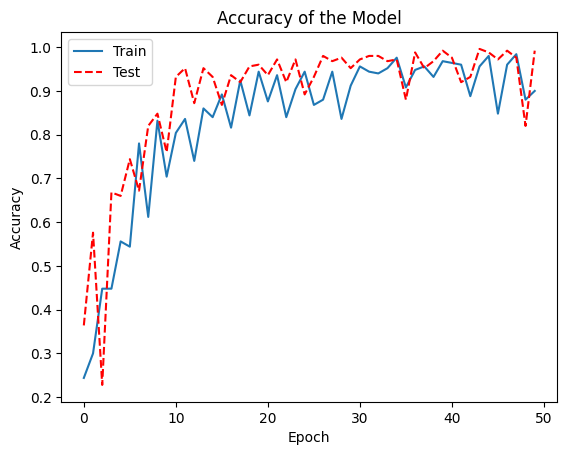

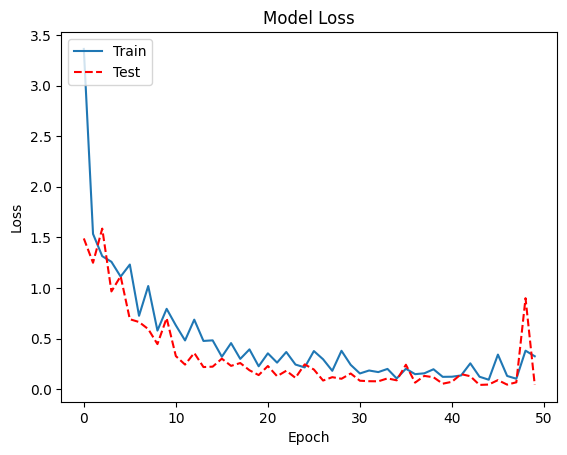

In [ ]:


# Visualización de la precisión y la pérdida durante el entrenamiento
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'], 'r--')
plt.title('Accuracy of the Model')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'], 'r--')
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

In [ ]:


# Carga y preparación de una imagen para hacer predicciones
img_path = '/content/drive/MyDrive/entrenamiento/entrenamiento/ajolotes/001 (11).jpg'
#img_path = '/content/drive/MyDrive/entrenamiento/entrenamiento/ardillas/01 (101).jpg'
img = image.load_img(img_path, target_size=IMAGE_SIZE)
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)
img_array = preprocess_input(img_array)

In [ ]:

# Predicción utilizando el modelo
preds = model.predict(img_array)
print("Predicted class:", np.argmax(preds, axis=1))

1/1 [==============================] - 0s 29ms/step
Predicted class: [1]


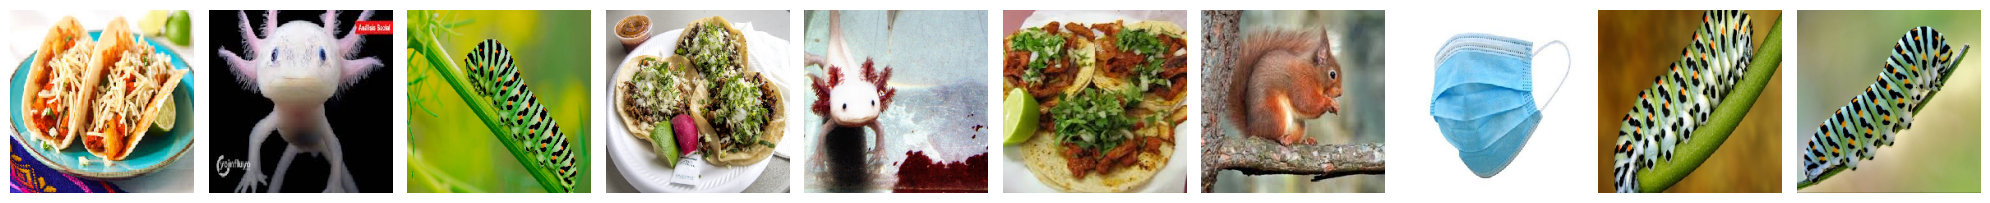

[[0. 0. 0. 0. 1.]
 [1. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 1.]
 [1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1.]
 [0. 1. 0. 0. 0.]
 [0. 0. 1. 0. 0.]
 [0. 0. 0. 1. 0.]
 [0. 0. 0. 1. 0.]
 [1. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0.]
 [0. 0. 0. 1. 0.]
 [1. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 1.]
 [0. 1. 0. 0. 0.]
 [0. 0. 1. 0. 0.]
 [0. 1. 0. 0. 0.]
 [0. 1. 0. 0. 0.]
 [0. 1. 0. 0. 0.]
 [0. 0. 1. 0. 0.]
 [0. 1. 0. 0. 0.]
 [0. 0. 1. 0. 0.]
 [0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 1.]
 [1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0.]]


In [ ]:
# Visualizar imágenes de prueba y etiquetas
imgs, labels = next(test_data)
plotImages(imgs)
print(labels)

In [ ]:
# Obtener un lote de imágenes y etiquetas del conjunto de datos de prueba
test_imgs, test_labels = next(test_data)

# Predecir las clases de las imágenes de prueba
preds = model.predict(test_imgs)

# Convertir las predicciones y etiquetas de one-hot encoding a clases
pred_classes = np.argmax(preds, axis=1)
true_classes = np.argmax(test_labels, axis=1)

1/1 [==============================] - 0s 28ms/step


In [ ]:
# Identificar las imágenes correctamente y mal clasificadas
correct_indices = np.where(pred_classes == true_classes)[0]
incorrect_indices = np.where(pred_classes != true_classes)[0]

# Mostrar las imágenes correctamente clasificadas
print("Correctly classified images indices:", correct_indices)

# Mostrar las imágenes mal clasificadas
print("Incorrectly classified images indices:", incorrect_indices)

Correctly classified images indices: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31]
Incorrectly classified images indices: []


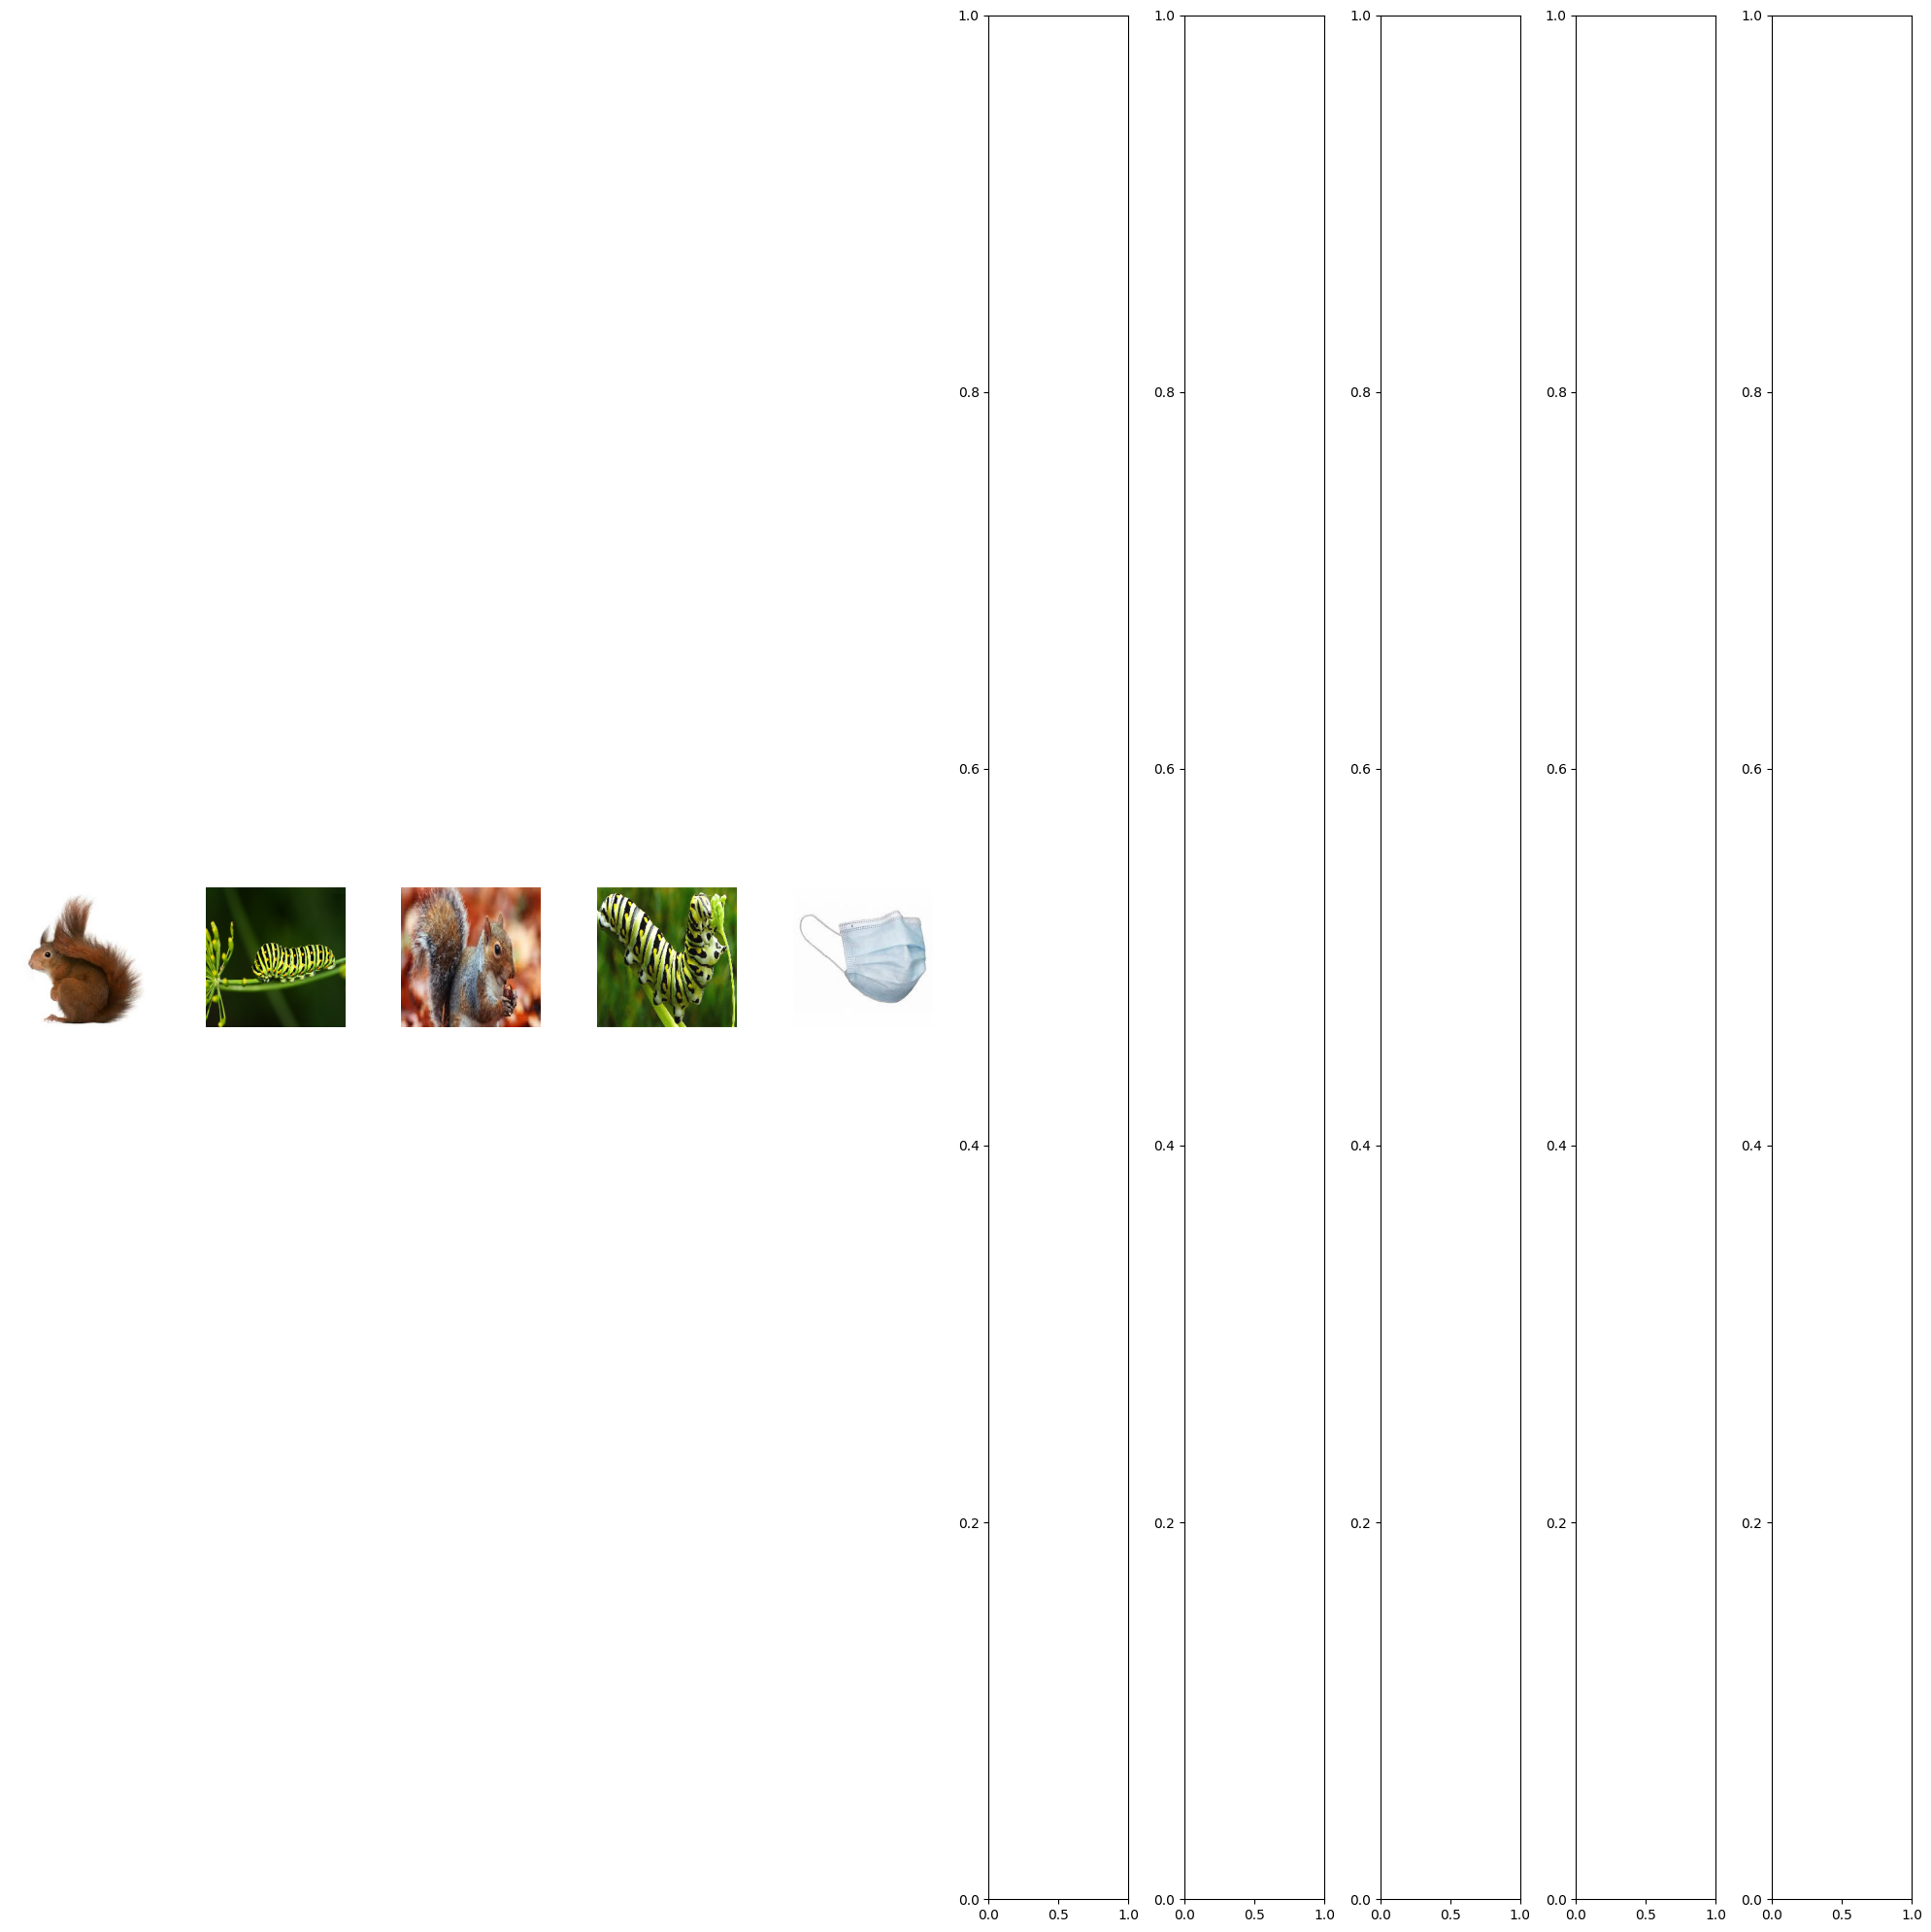

In [ ]:

# Si deseas ver las imágenes, puedes usar la función plotImages con índices correctos o incorrectos
# Por ejemplo, para ver las primeras 5 imágenes correctamente clasificadas:
if len(correct_indices) > 0:
    plotImages(test_imgs[correct_indices[:5]])

# Y para ver las primeras 5 imágenes incorrectamente clasificadas:
if len(incorrect_indices) > 0:
    plotImages(test_imgs[incorrect_indices[:5]])

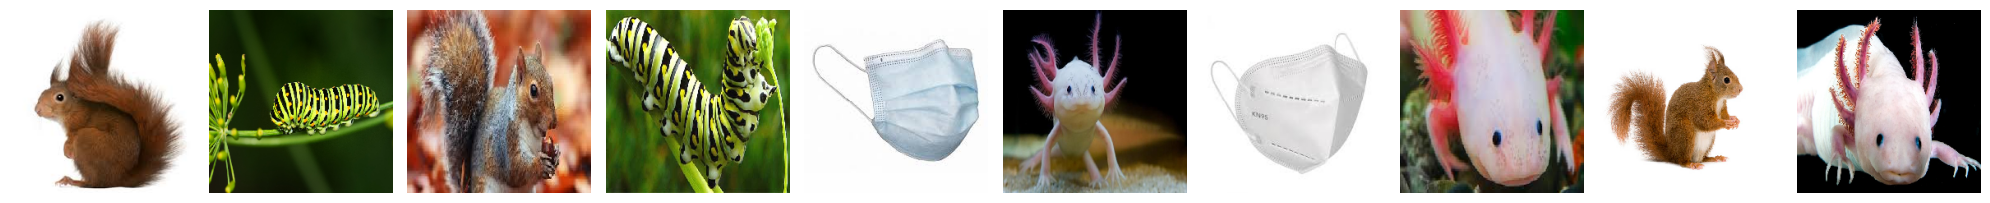

In [ ]:
# Asumiendo que test_imgs contiene las imágenes y que incorrect_indices contiene los índices de las mal clasificadas
if len(correct_indices) > 0:
    plotImages(test_imgs[correct_indices])

In [ ]:
# Asumiendo que test_imgs contiene las imágenes y que incorrect_indices contiene los índices de las mal clasificadas
if len(incorrect_indices) > 0:
    plotImages(test_imgs[incorrect_indices])

1/1 [==============================] - 0s 28ms/step
Porcentaje de clasificaciones incorrectas: 6.25%
Índices incorrectos:  [11 17]
Etiquetas verdaderas para las clasificaciones incorrectas:  [1 3]
Predicciones incorrectas:  [0 2]


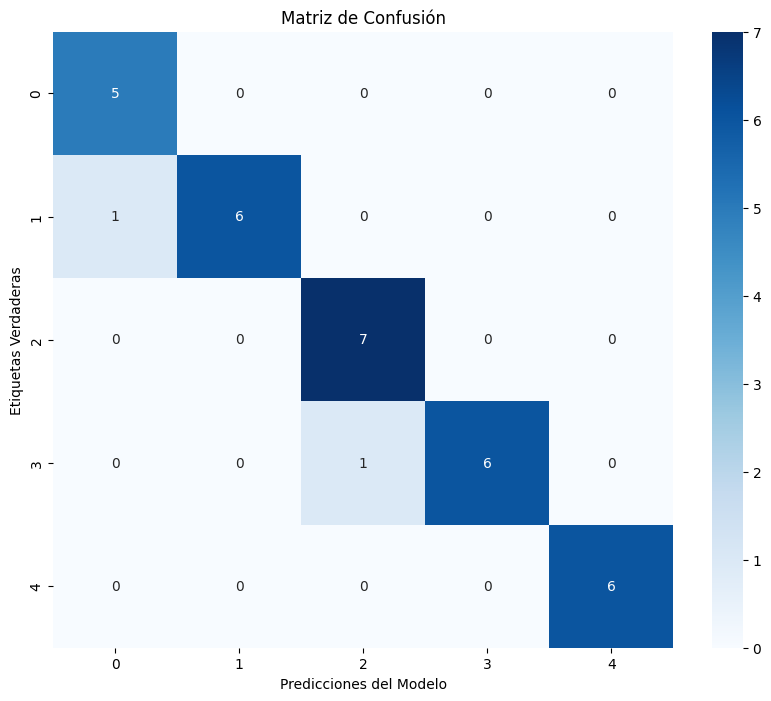

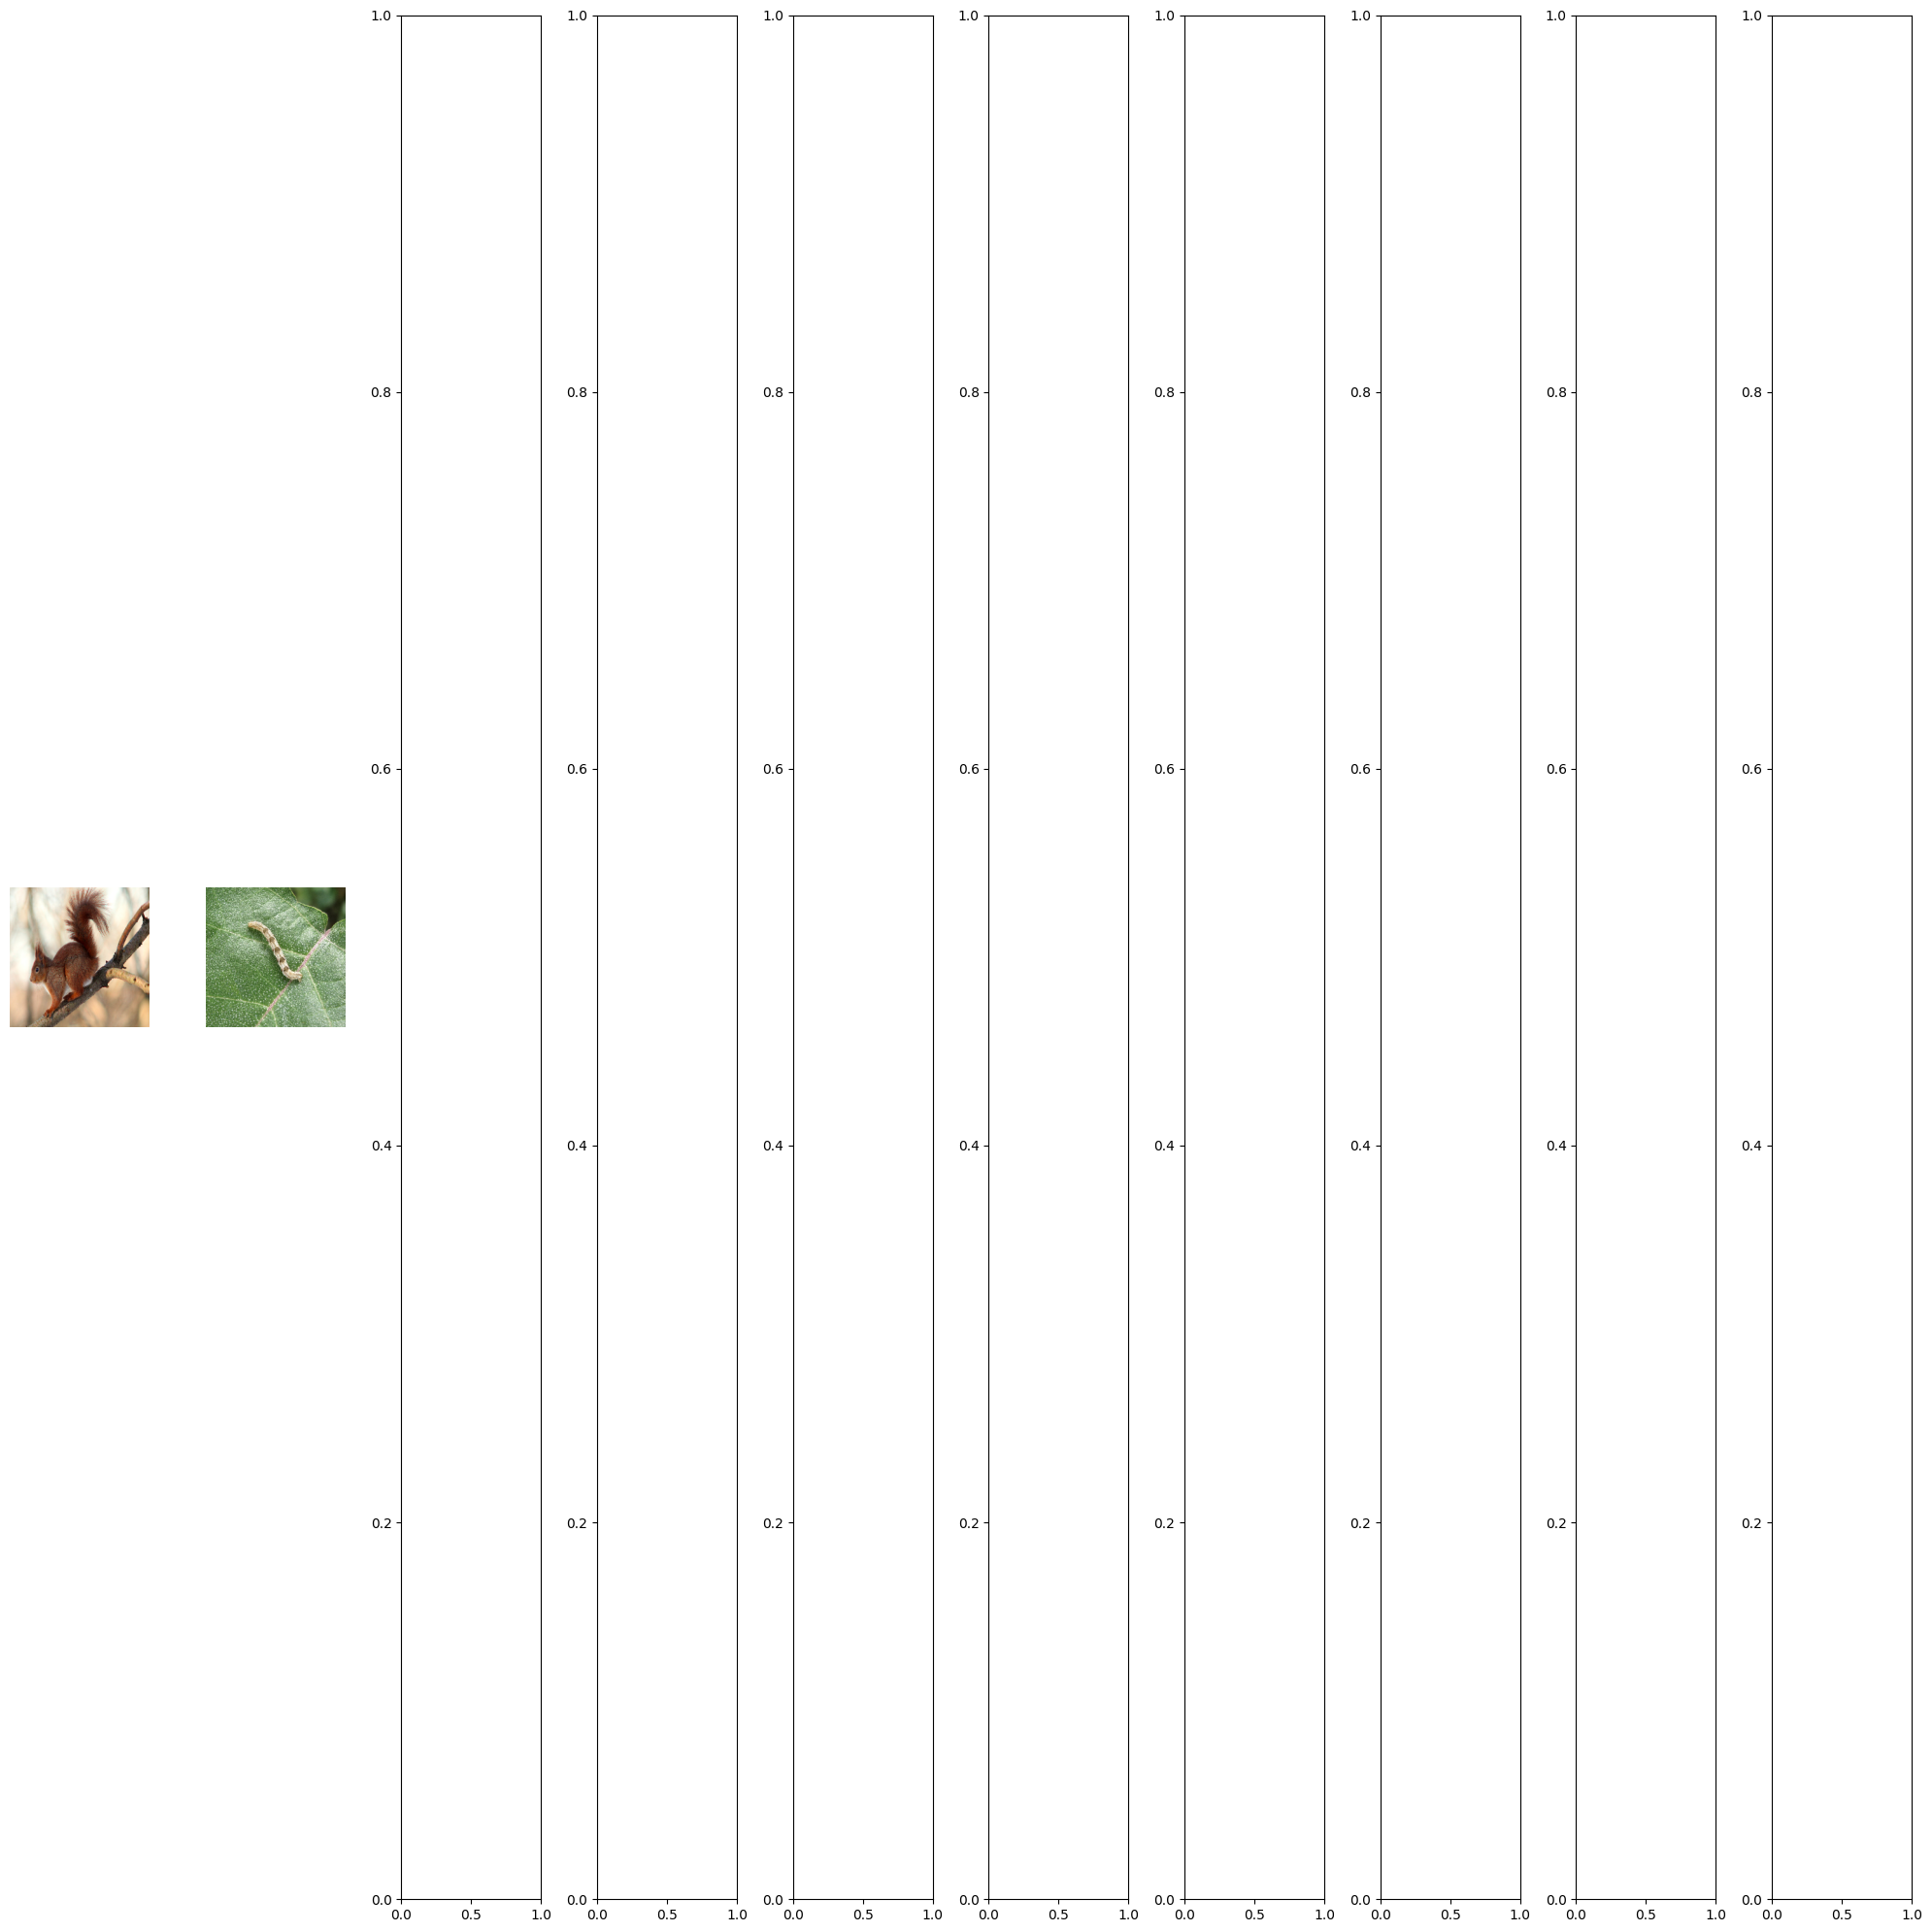

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Obtener un lote de imágenes y etiquetas del conjunto de datos de prueba
test_imgs, test_labels = next(test_data)

# Predecir las clases de las imágenes de prueba
preds = model.predict(test_imgs)

# Convertir las predicciones y etiquetas de one-hot encoding a clases
pred_classes = np.argmax(preds, axis=1)
true_classes = np.argmax(test_labels, axis=1)

# Identificar las imágenes mal clasificadas
incorrect_indices = np.where(pred_classes != true_classes)[0]
incorrect_preds = pred_classes[incorrect_indices]
true_labels_for_incorrects = true_classes[incorrect_indices]

# Crear una matriz de confusión
cm = confusion_matrix(true_classes, pred_classes)

# Porcentaje de etiquetas incorrectas
num_incorrect = len(incorrect_indices)
total_predictions = len(pred_classes)
percentage_incorrect = (num_incorrect / total_predictions) * 100
print(f"Porcentaje de clasificaciones incorrectas: {percentage_incorrect:.2f}%")

# Imprimir las etiquetas verdaderas y las predicciones incorrectas
print("Índices incorrectos: ", incorrect_indices)
print("Etiquetas verdaderas para las clasificaciones incorrectas: ", true_labels_for_incorrects)
print("Predicciones incorrectas: ", incorrect_preds)

# Visualizar la matriz de confusión
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Matriz de Confusión')
plt.ylabel('Etiquetas Verdaderas')
plt.xlabel('Predicciones del Modelo')
plt.show()

# Si deseas ver las imágenes, puedes usar la función plotImages con índices incorrectos
if len(incorrect_indices) > 0:
    plotImages(test_imgs[incorrect_indices])